<a href="https://colab.research.google.com/github/deepthivj-aiml/Projects-ML/blob/master/Linear_regression_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# For cleaner outputs
np.set_printoptions(precision=4)
plt.style.use("seaborn-v0_8")


In [ ]:
# =========================================================
# Step 1: Create a simple dataset
# =========================================================
# Let's assume we are predicting "House Price" based on "Size (sq ft)"
X = np.array([500, 800, 1000, 1200, 1500])  # feature
y = np.array([150000, 200000, 230000, 260000, 300000])  # target


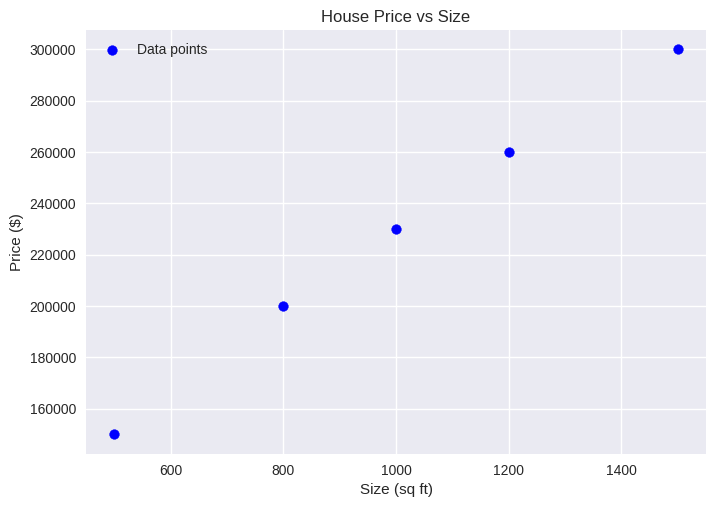

In [ ]:
# Visualize
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("House Price vs Size")
plt.legend()
plt.show()

In [ ]:
# =========================================================
# Step 2: Define the hypothesis function
# =========================================================
# h(x) = theta0 + theta1 * x

def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X


In [ ]:
# Example:
theta0, theta1 = 50000, 150
predictions = hypothesis(X, theta0, theta1)
print("Predicted prices with theta0=50000, theta1=150:\n", predictions)

Predicted prices with theta0=50000, theta1=150:
 [125000 170000 200000 230000 275000]


In [ ]:

# =========================================================
# Step 3: Define the cost function (Mean Squared Error)
# =========================================================
def compute_cost(X, y, theta0, theta1):
    m = len(y)
    predictions = hypothesis(X, theta0, theta1)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [ ]:
cost_example = compute_cost(X, y, 50000, 150)
print("\nExample cost with theta0=50000, theta1=150:", cost_example)



Example cost with theta0=50000, theta1=150: 395000000.0


In [ ]:

# =========================================================
# Step 4: Gradient Descent Algorithm
# =========================================================
def gradient_descent(X, y, alpha=0.0000001, iterations=1000):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []

    for i in range(iterations):
        predictions = hypothesis(X, theta0, theta1)
        error = predictions - y
        # partial derivatives
        d_theta0 = (1/m) * np.sum(error)
        d_theta1 = (1/m) * np.sum(error * X)

        # update parameters
        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1

        cost_history.append(compute_cost(X, y, theta0, theta1))

    return theta0, theta1, cost_history

In [ ]:
theta0, theta1, cost_history = gradient_descent(X, y, alpha=0.0000001, iterations=2000)
print(f"\nTheta0: {theta0:.2f}, Theta1: {theta1:.2f}")



Theta0: 1.82, Theta1: 219.89


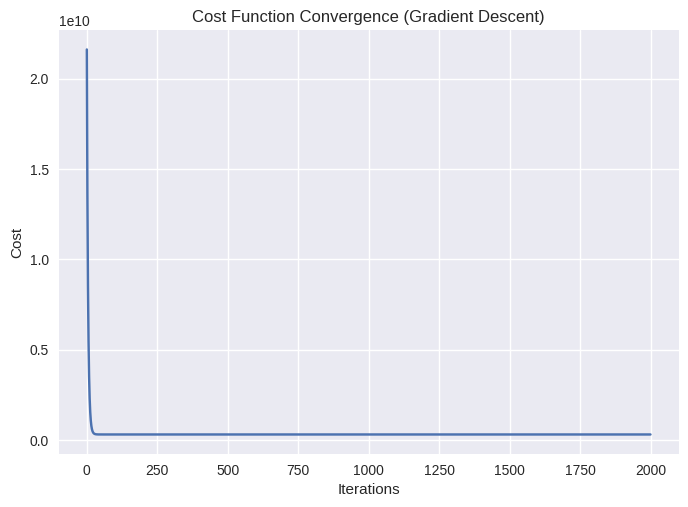

In [ ]:
# Plot cost function convergence
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (Gradient Descent)")
plt.show()

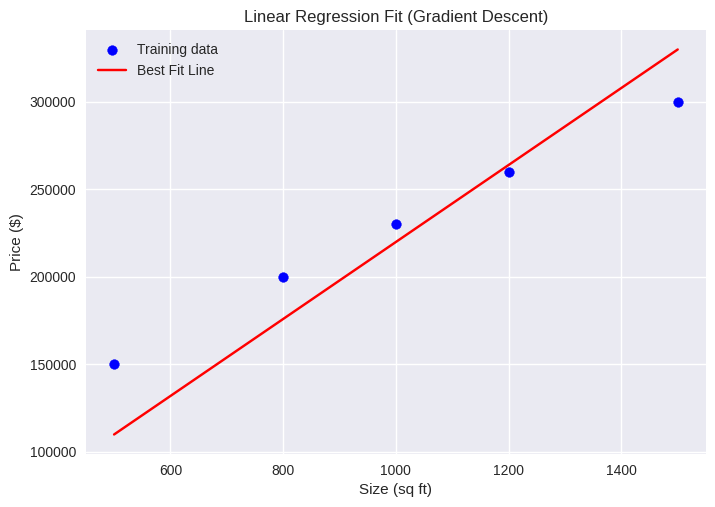

In [ ]:
# Plot best-fit line
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X, hypothesis(X, theta0, theta1), color='red', label='Best Fit Line')
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Linear Regression Fit (Gradient Descent)")
plt.show()

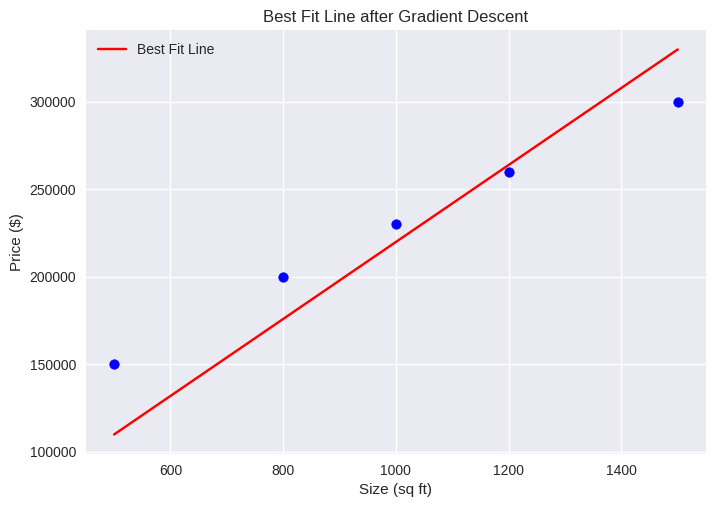

Final parameters: θ₀ = 1.01, θ₁ = 219.89
Final cost: 319185377.82


In [ ]:
theta0, theta1, cost_history = gradient_descent(X, y, alpha=0.0000001, iterations=1000)

plt.scatter(X, y, color='blue')
plt.plot(X, hypothesis(X, theta0, theta1), color='red', label='Best Fit Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('Best Fit Line after Gradient Descent')
plt.legend()
plt.show()

print(f"Final parameters: θ₀ = {theta0:.2f}, θ₁ = {theta1:.2f}")
print(f"Final cost: {cost_history[-1]:.2f}")


In [ ]:
# =========================================================
# Step 5: Stochastic Gradient Descent (SGD)
# =========================================================
def stochastic_gradient_descent(X, y, alpha=0.0000001, epochs=10):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []

    for epoch in range(epochs):
        for i in range(m):
            xi, yi = X[i], y[i]
            prediction = hypothesis(xi, theta0, theta1)
            error = prediction - yi

            theta0 -= alpha * error
            theta1 -= alpha * error * xi

        cost = compute_cost(X, y, theta0, theta1)
        cost_history.append(cost)

    return theta0, theta1, cost_history

In [ ]:
theta0_sgd, theta1_sgd, cost_sgd = stochastic_gradient_descent(X, y)
print(f"\n(SGD) Theta0: {theta0_sgd:.2f}, Theta1: {theta1_sgd:.2f}")



(SGD) Theta0: 0.24, Theta1: 215.23


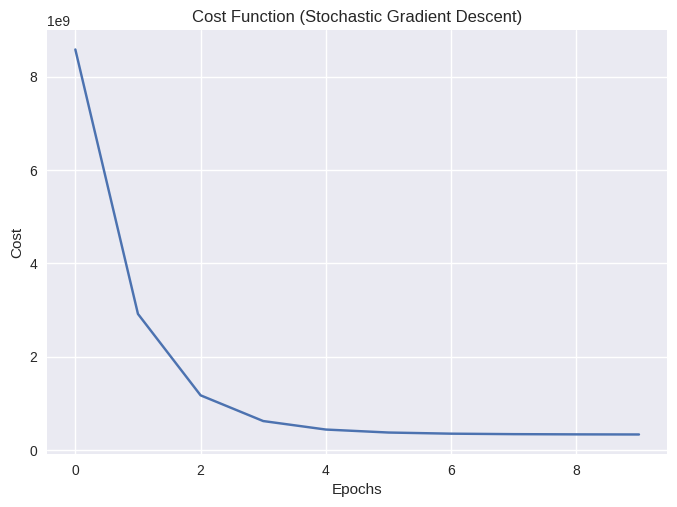

In [ ]:
plt.plot(cost_sgd)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function (Stochastic Gradient Descent)")
plt.show()


In [ ]:
# =========================================================
# Step 6: Normal Equation (Direct Solution)
# =========================================================
# Formula: θ = (Xᵀ * X)^(-1) * Xᵀ * y

# Add bias term (column of ones)
X_b = np.c_[np.ones((len(X), 1)), X]  # shape (m, 2)


In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("\nNormal Equation solution:", theta_best)


Normal Equation solution: [78000.   150.]


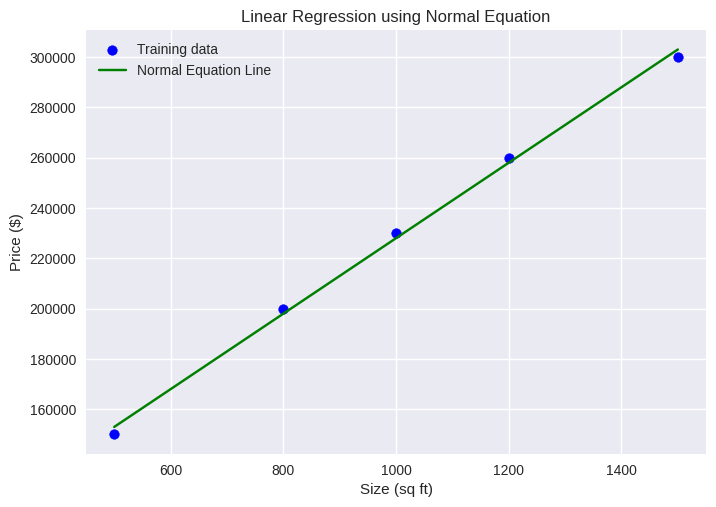

In [ ]:
# Predicted line
y_pred_normal = X_b.dot(theta_best)
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X, y_pred_normal, color='green', label='Normal Equation Line')
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Linear Regression using Normal Equation")
plt.show()


In [ ]:
# =========================================================
# Step 7: Compare Gradient Descent vs Normal Equation
# =========================================================
print("\nComparison of Results:")
print(f"Gradient Descent Thetas: θ0={theta0:.2f}, θ1={theta1:.2f}")
print(f"Normal Equation Thetas: θ0={theta_best[0]:.2f}, θ1={theta_best[1]:.2f}")


Comparison of Results:
Gradient Descent Thetas: θ0=1.82, θ1=219.89
Normal Equation Thetas: θ0=78000.00, θ1=150.00


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


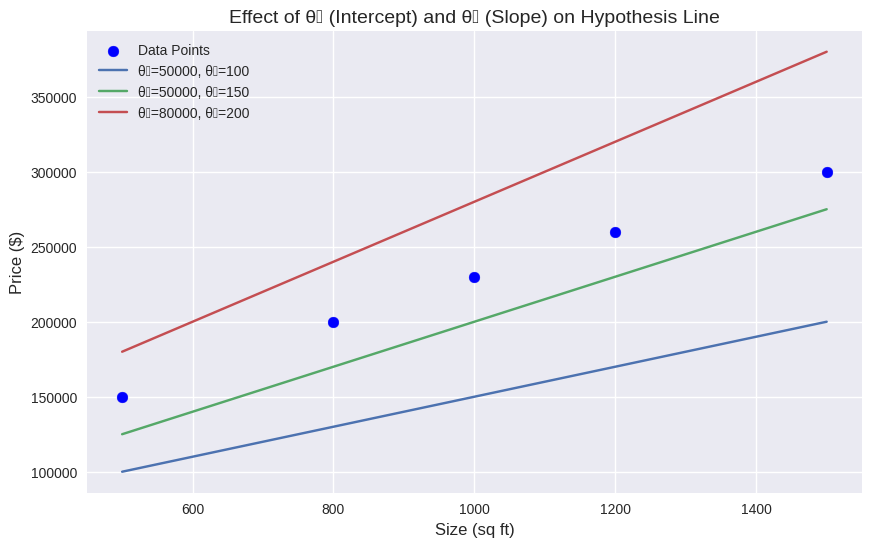

In [ ]:
# =========================================================
# Visualizing how theta0 (intercept) and theta1 (slope) affect the hypothesis
# =========================================================

import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([500, 800, 1000, 1200, 1500])
y = np.array([150000, 200000, 230000, 260000, 300000])

# Hypothesis function
def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

# Plot setup
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Data Points', s=60)

# Try 3 different parameter combinations
thetas = [
    (50000, 100),   # lower slope
    (50000, 150),   # moderate slope
    (80000, 200)    # higher slope and higher intercept
]

# Draw multiple hypothesis lines
for theta0, theta1 in thetas:
    y_pred = hypothesis(X, theta0, theta1)
    plt.plot(X, y_pred, label=f"θ₀={theta0}, θ₁={theta1}")

plt.xlabel("Size (sq ft)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Effect of θ₀ (Intercept) and θ₁ (Slope) on Hypothesis Line", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
